# 初探 YOLO

作为一个基本没有深度学习知识基础的小白，这是我第一次接触YOLO，目标是使用YOLO对崩铁的目标识别。

从 [官网QuickStart](https://docs.ultralytics.com/quickstart/#use-ultralytics-with-python) 可以看到，YOLO已经得到高度封装。

为了对YOLO有个初步了解，我们先使用预训练好的模型对一张游戏截图进行识别试试。

首先对模型进行加载

In [1]:
from ultralytics import YOLO

model = YOLO('./../../../ultralytics/models/yolov8n.pt')  # 保存到一个公共文件夹 为了后续其它笔记可以共用

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:01<00:00, 4.16MB/s]


随便找一张游戏截图进行识别，并显示识别结果

In [2]:
results = model('./test.png')


image 1/1 D:\Users\yijie.mo\root\workspace\myself\StarRail-YOLO\notebook\experiments\01-YOLO\test.png: 384x640 2 persons, 130.0ms
Speed: 7.0ms preprocess, 130.0ms inference, 2383.7ms postprocess per image at shape (1, 3, 384, 640)


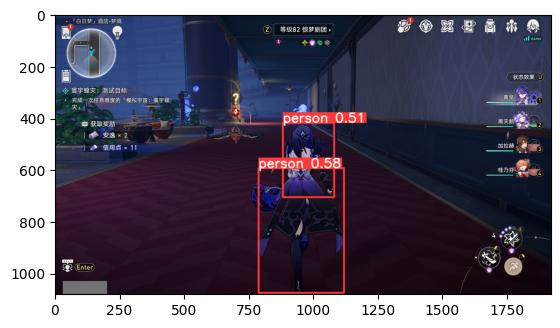

In [3]:
import matplotlib.pyplot as plt
import cv2
for result in results:
    plt.imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))

这里可以看到YOLO将图转化成了(384*640)，这应该是为了适应模型，缩放大小是怎么决定的呢？这个在 [官网predict文档](https://docs.ultralytics.com/modes/predict/#inference-arguments) 中有提及。

`imgsz` 参数可以调整图片的大小，来试试原图大小看看效果如何。


WARNING  imgsz=[1080, 1920] must be multiple of max stride 32, updating to [1088, 1920]
image 1/1 D:\Users\yijie.mo\root\workspace\myself\StarRail-YOLO\notebook\experiments\01-YOLO\test.png: 1088x1920 3 persons, 1 traffic light, 1 bench, 1 chair, 1 potted plant, 419.1ms
Speed: 16.0ms preprocess, 419.1ms inference, 4.3ms postprocess per image at shape (1, 3, 1088, 1920)


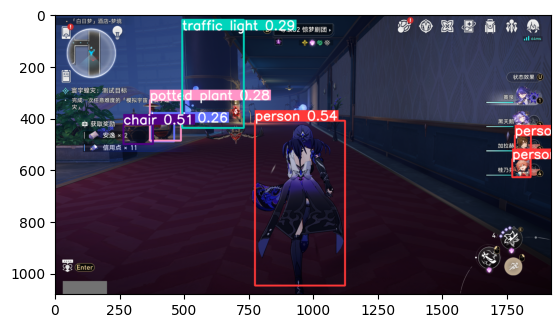

In [4]:
result = model.predict('./test.png', imgsz=(1080, 1920))
plt.imshow(cv2.cvtColor(result[0].plot(), cv2.COLOR_BGR2RGB))

这次运行给了两个信息

- WARNING提示，图片的长宽都需要是32的倍数，程序自动帮我们调整了。了解到这跟模型的结构有关，后续有机会再展开讲叙。
- 图片分辨率提高后，识别更精准了(只有一个人的框)，也可以识别到更多东西了，但推理花费的时间也随着增加，这很合理。

同时也引出两个问题

- 自动缩放到32倍长宽的策略是什么 - [缩放后补充](https://github.com/orgs/ultralytics/discussions/6994?sort=new#discussioncomment-8382661)
- 训练和预测时使用的图片大小不一样会有什么影响 - [全卷积结构对大小有较好兼容性 需要测试取较好效果](https://github.com/orgs/ultralytics/discussions/8768#discussioncomment-8891443)

既然可以兼容各种图片大小，那我们就开始尝试训练自己的模型。